## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Explorattion and Visualization](#Missing)
5. [Outliers Detection and Removal](#Outliers)
6. [Feature engineering If Need Be](#Engineering)
8. [Correlations - EDA](#Correlations)
9. [Data Preprocess](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv("NFA 2019 public_data.csv")
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


## Staistical Summaries

In [3]:
df.describe()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
count,72186.000000,72186.000000,5.171400e+04,5.171400e+04,5.171300e+04,5.171300e+04,5.171300e+04,7.217700e+04
mean,1990.263154,155.618915,1.920772e+07,1.352875e+07,1.004860e+07,1.984737e+06,3.072609e+07,7.792960e+07
std,16.018761,390.261979,1.685819e+08,1.294180e+08,1.081375e+08,1.730488e+07,3.989630e+08,7.455443e+08
min,1961.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.876963e-02
25%,1977.000000,59.000000,3.581080e-01,1.948302e-01,8.005409e-02,3.786298e-02,0.000000e+00,1.894023e+00
50%,1991.000000,121.000000,3.251810e+00,9.978667e+00,6.154094e+00,2.044437e-01,0.000000e+00,8.292253e+03
75%,2004.000000,193.000000,3.610817e+06,1.734192e+06,9.450000e+05,3.867180e+05,1.915736e+01,1.532959e+07
max,2016.000000,5001.000000,3.984702e+09,3.417089e+09,2.979605e+09,4.726163e+08,1.257160e+10,2.061182e+10


The describe method shows the statistical summaries ie the count (the number of values present in the column), mean, standard deviation, minimmum and maximum values, 25, 50, and 75 percentile of the individual columns that makes up the data.

## Data Exploraton and Visualization

In [4]:
df.shape
# Shows the number of rows and columns of the dataset

(72186, 12)

In [5]:
#Check data for missing values
df.isnull().sum().any()

True

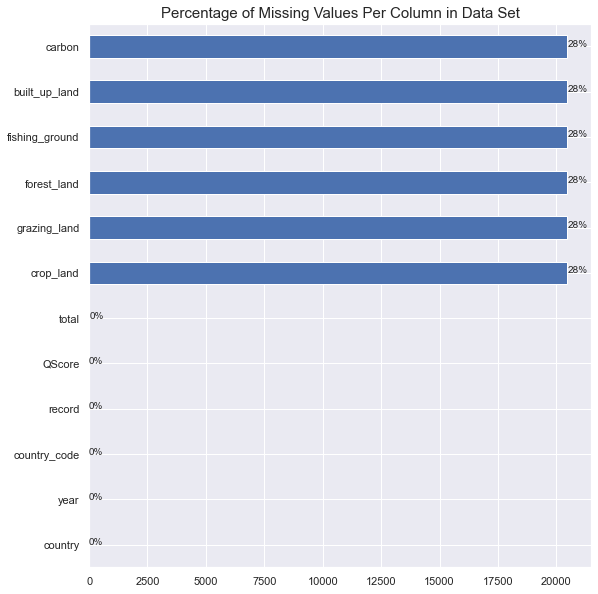

In [6]:
# Plot missing values in Data set for visualization
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Data Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

The plot above shows that the features: carborn, built_up_land, fishing_ground, forest_land, grazing_land, and crop_land has 28% of their values missing while the rest of the features has no missing value

In [6]:
df.dropna(inplace=True)

In [7]:
value_count = df["QScore"].value_counts()
value_count

3A    51473
2A      224
1A       16
Name: QScore, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


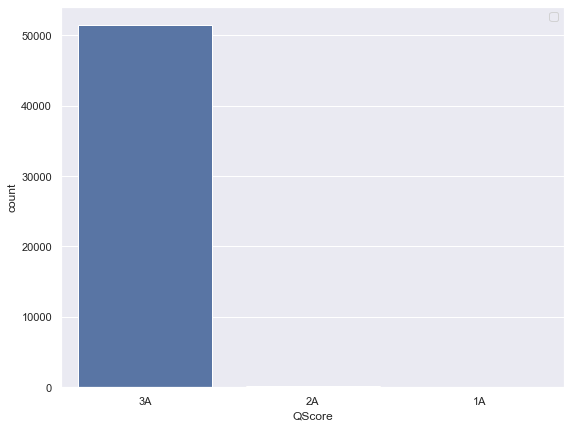

In [8]:
plt.figure(figsize=(9, 7))
sns.countplot(df["QScore"]);
plt.legend()

The Plot shows that there are very few values in the 1A and 1B data, so we will drop them and proceed with the rest of the target

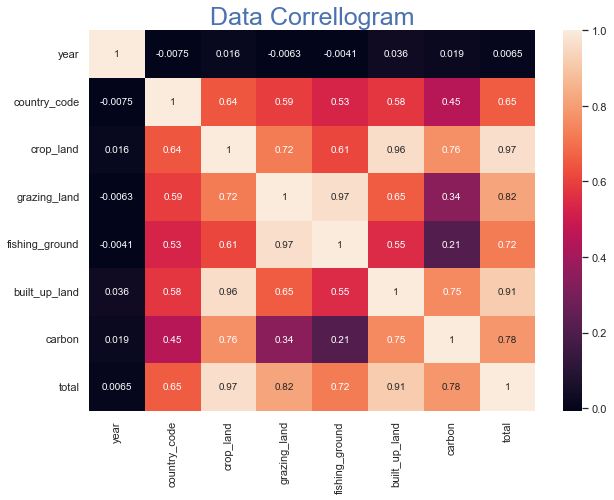

In [9]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Data Correllogram', fontsize=25, color='b')
plt.savefig('stagec_corr.png', bbox_inches='tight')

The correlogram shows that all the features (aside the year feature) of the dataset are more than 50% correlated

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


The Info method shows that there are four features with data types as object, namely: country, record, and QScore. The rest of the features are numeric

In [10]:
# Checking the number of unique values in the selected features
columns = ["country", "year", "country_code", "record", "QScore"]
print("No of Unique values in Dataset")
for column in columns:
    print(column, ">>>>", df[column].nunique())

No of Unique values in Dataset
country >>>> 165
year >>>> 56
country_code >>>> 165
record >>>> 8
QScore >>>> 3


In [17]:
df2 = df[df.columns == np.nan]

AttributeError: 'float' object has no attribute 'columns'

In [16]:
df2.head()

AttributeError: 'bool' object has no attribute 'head'

In [12]:
for column in df.columns:
    print(f"mode of {column} >>>>", df[column].mode())
    print(f"median of {column} >>>>>", df[column].median())
    print(f"mean of {column}>>>>>", df[column].mean())

mode of country >>>> 0                           Afghanistan
1                               Albania
2                                Angola
3                             Argentina
4                             Australia
                    ...                
85    Venezuela, Bolivarian Republic of
86                             Viet Nam
87                                World
88                                Yemen
89                             Zimbabwe
Length: 90, dtype: object


TypeError: could not convert string to float: 'Armenia'

## Outlier Detection and Removal

#### **Here we used the following methods:**
* box plot to detect the ouliers and remove them
* 3 standard deviation
* z-score
* InterQuatile Range (IQR) 

In [13]:
from scipy.stats import norm

In [14]:
df.columns

Index(['country', 'year', 'country_code', 'record', 'crop_land',
       'grazing_land', 'forest_land', 'fishing_ground', 'built_up_land',
       'carbon', 'total', 'QScore'],
      dtype='object')

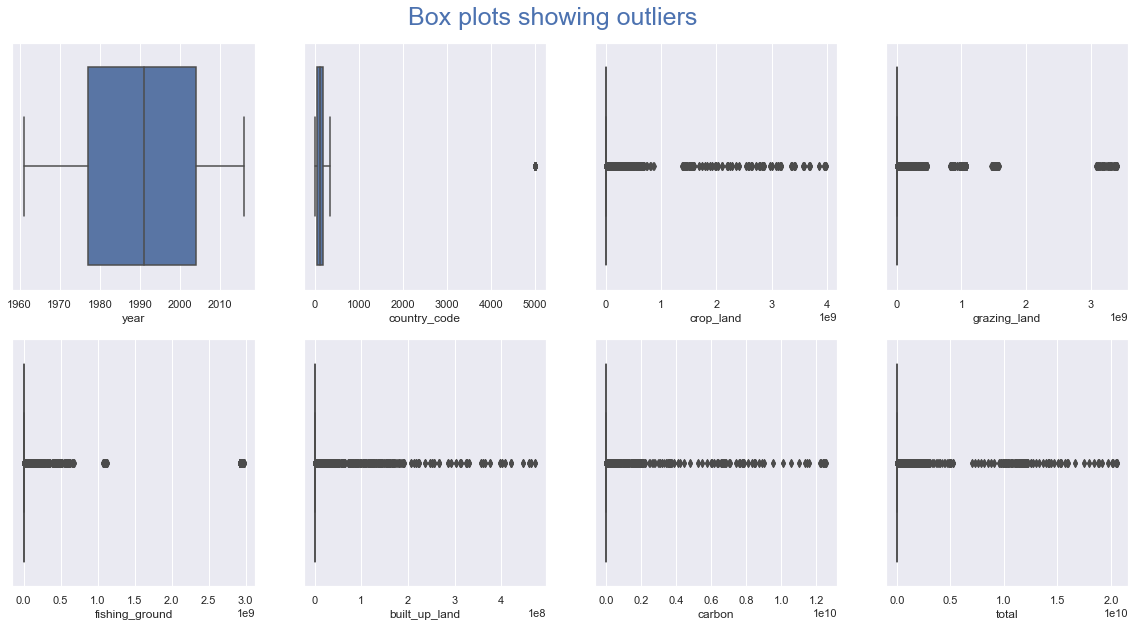

In [15]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 25, color='b')

for ax, data, name in zip(axes.flatten(), df, ['year', 'country_code', 'crop_land', 'grazing_land',
                                                'fishing_ground', 'built_up_land', 'carbon', 'total']):
  sns.boxplot(df[name], ax = ax)

plt.savefig('Box plots showing Outliers', bbox_inches='tight')

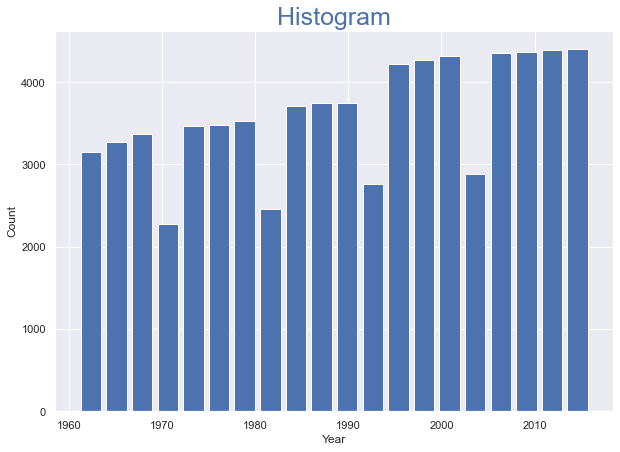

In [17]:
# Histogram Plot showing Distribution

plt.figure(figsize=(10, 7))
plt.hist(df.year, bins=20, rwidth=0.8)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram', fontsize=25, color='b');


rng = np.arange(df.year.mean(), df.year.std(), 0.1)
plt.plot(rng, norm.pdf(rng, df.year.mean(), df.year.std()))

The Histogram show that the data in the dataset is not normally distributed (did not follow normal distribution) and that the data icreases progressively with year (Positive Correlation).

In [51]:
upper_limit = df['year'].mean() + 1*df['year'].std()
lower_limit = df['year'].mean() - 1*df['year'].std()

upper_limit, lower_limit

(2006.2819142257276, 1974.2443928144185)

In [52]:
df_no_outlier = df[(df.year<upper_limit) & (df.year>lower_limit)]

In [53]:
df_no_outlier.shape, df.shape

((42032, 12), (72186, 12))

In [59]:
df_no_outlier = df_no_outlier.dropna(inplace=True)
df_no_outlier.isnull().sum()

AttributeError: 'NoneType' object has no attribute 'isnull'

In [54]:
df = df.dropna(inplace=True)
df.isnull().sum()

AttributeError: 'NoneType' object has no attribute 'isnull'

## Data Preprocessing

In [11]:
import sklearn.utils
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Using Undersampling and SMOTE Techniques

In [31]:
df['forest_land'] = pd.to_numeric(df['forest_land'])

In [34]:
df["QScore"] = df["QScore"].replace(["1A"], "2A")
df["QScore"].value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [35]:
df_2A = df[df.QScore == "2A"]
df_3A = df[df.QScore == "3A"].sample(400)
df3 = df_2A.append(df_3A)

In [36]:
df_2A = df[df.QScore == "2A"]
df_3A = df[df.QScore == "3A"]
df_2A.shape, df_3A.shape, df3.shape

((240, 12), (51473, 12), (640, 12))

In [37]:
df3['QScores'] = df3.QScore.replace({'2A':0, '3A':1})
#df5 = pd.concat([df3, df4], axis='columns')
df3.head(10)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore,QScores
1536,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,4.835727e-02,0.022585,2.998367e-02,0.000000e+00,1.119497e+00,2A,0
1537,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1.963600e+06,917100.000000,1.217520e+06,0.000000e+00,4.545842e+07,2A,0
1538,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,2.716674e-02,0.007948,2.924496e-02,0.000000e+00,5.301590e-01,2A,0
1539,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1.103135e+06,322736.916200,1.187524e+06,0.000000e+00,2.152769e+07,2A,0
1540,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,1.628008e-01,0.014729,2.924496e-02,1.391455e+00,2.407316e+00,2A,0
1541,Algeria,2016,4,EFConsTotGHA,2.550278e+07,7.351053e+06,6.610707e+06,598091.449800,1.187524e+06,5.650158e+07,9.775173e+07,2A,0
1542,Algeria,2016,4,EFProdPerCap,2.021916e-01,1.232246e-01,8.320841e-02,0.007628,2.924496e-02,1.157880e+00,1.603378e+00,2A,0
1543,Algeria,2016,4,EFProdTotGHA,8.210214e+06,5.003670e+06,3.378769e+06,309741.835300,1.187524e+06,4.701701e+07,6.510693e+07,2A,0
7416,Belize,2016,23,AreaPerCap,2.997651e-01,1.362569e-01,3.709675e+00,2.613679,3.275180e-04,0.000000e+00,6.759703e+00,2A,0
7417,Belize,2016,23,AreaTotHA,1.100000e+05,5.000000e+04,1.361280e+06,959100.000000,1.201840e+02,0.000000e+00,2.480500e+06,2A,0


In [38]:
X_un = df3.drop(columns=["country_code", "country", "year", "QScore", "QScores"])

In [39]:
y_un = df3["QScores"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_un, y_un, test_size=0.2, random_state=42, stratify=y_un)

In [41]:
X_train.head()

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
26680,AreaPerCap,1.847103e-01,8.395925e-02,1.961868e-02,8.889605e-02,1.930005e-02,0.000000e+00,3.964844e-01
30535,EFProdTotGHA,2.655504e+07,3.274207e+06,6.010280e+06,1.171125e+06,1.651744e+06,4.069690e+07,7.935930e+07
65522,AreaPerCap,7.647377e-01,1.369308e+00,1.532372e+00,1.244262e+00,2.719314e-02,0.000000e+00,4.937873e+00
7122,BiocapPerCap,1.063044e+00,1.000909e+00,6.839787e+00,1.707325e-01,9.276363e-02,0.000000e+00,9.167236e+00
26133,EFConsTotGHA,2.787727e+05,3.048723e+05,4.815459e+05,1.461460e+04,3.368698e+04,7.155276e+05,1.829020e+06


In [42]:
y_train.head()

26680    1
30535    1
65522    1
7122     1
26133    1
Name: QScores, dtype: int64

In [43]:
# Label encoding the categorical variables ie changing them into numerical variables
encoder = LabelEncoder()

X_train.record = encoder.fit_transform(X_train.record)
X_test.record = encoder.fit_transform(X_test.record)

In [44]:
X_train.head()

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
26680,0,1.847103e-01,8.395925e-02,1.961868e-02,8.889605e-02,1.930005e-02,0.000000e+00,3.964844e-01
30535,7,2.655504e+07,3.274207e+06,6.010280e+06,1.171125e+06,1.651744e+06,4.069690e+07,7.935930e+07
65522,0,7.647377e-01,1.369308e+00,1.532372e+00,1.244262e+00,2.719314e-02,0.000000e+00,4.937873e+00
7122,2,1.063044e+00,1.000909e+00,6.839787e+00,1.707325e-01,9.276363e-02,0.000000e+00,9.167236e+00
26133,5,2.787727e+05,3.048723e+05,4.815459e+05,1.461460e+04,3.368698e+04,7.155276e+05,1.829020e+06


In [45]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority", random_state=42)
X_train_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [46]:
scaler = MinMaxScaler()
normalized_train_df = scaler.fit_transform(X_train_balanced.drop(columns=["record"]))
normalized_train_df = pd.DataFrame(normalized_train_df, columns=X_train_balanced.drop(columns=["record"]).columns)
normalized_train_df["record"] = X_train_balanced["record"]

X_test = X_test.reset_index(drop=True)
normalized_test_df = scaler.transform(X_test.drop(columns=["record"]))
normalized_test_df = pd.DataFrame(normalized_test_df, columns=X_test.drop(columns=["record"]).columns)
normalized_test_df["record"] = X_test["record"]

In [47]:
normalized_train_df.head()

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,record
0,4.608290e-11,2.634396e-11,4.821091e-12,3.044046e-11,4.086077e-11,0.000000,1.099789e-11,0
1,6.702158e-03,1.027350e-03,1.476965e-03,4.010253e-04,3.557329e-03,0.003293,3.870407e-03,7
2,1.924745e-10,4.296490e-10,3.765648e-10,4.260695e-10,5.785996e-11,0.000000,2.324845e-10,0
3,2.677631e-10,3.140562e-10,1.680808e-09,5.846351e-11,1.990779e-10,0.000000,4.387535e-10,2
4,7.035872e-05,9.566003e-05,1.183350e-04,5.004442e-06,7.255100e-05,0.000058,8.920255e-05,5


## Modelling

In [48]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
#Try other models to figure out which one gives the best score using GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

#We now write a function

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "Lgbm":{
            "model":LGBMClassifier(),
            "params":{
                "normalize":[True, False]
            }
        },
        
        "Xgboost": {
            "model": XGBClassifier(),
            "params": {
                "alpha": [1,2],
                "normalize":[True, False]
            }
        },
                
        "Random_forest": {
            "model": RandomForestClassifier(),
            "params": {
                "alpha": [1,2],
                "selection": ["random", "cyclic"]
            }
        },
        
        "Decision_tree": {
            "model": DecisionTreeClassifier(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        }
    }
    
    #To save the model into a dataframe
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model","best_score", "best_params"])

# Calling the function

find_best_model_using_gridsearchcv(X,y)
    

From the above, we found that the best performing model is _______ so we proceed towards using it for predictions, evaluations and saving

In [57]:
clf1 = XGBClassifier(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)
clf4 = LGBMClassifier(random_state=42)
clf5 = CatBoostClassifier(random_state=42, verbose=True)

In [62]:
model = VotingClassifier([('XGBC', clf1),('RFC', clf2),('DTC',clf3), ('LGBM',clf4), ('CBC',clf5)],weights=(1,1,1,1,1))
model.fit(normalized_train_df, y_balanced)
y_pred = model.predict(X_test)

[15:23:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008515
0:	learn: 0.6922260	total: 4.75ms	remaining: 4.74s
1:	learn: 0.6909260	total: 8.78ms	remaining: 4.38s
2:	learn: 0.6897085	total: 12.9ms	remaining: 4.28s
3:	learn: 0.6880961	total: 17.6ms	remaining: 4.38s
4:	learn: 0.6866529	total: 21.7ms	remaining: 4.31s
5:	learn: 0.6855811	total: 25.9ms	remaining: 4.29s
6:	learn: 0.6848124	total: 29.9ms	remaining: 4.24s
7:	learn: 0.6838148	total: 33.8ms	remaining: 4.2s
8:	learn: 0.6824653	total: 38ms	remaining: 4.18s
9:	learn: 0.6810428	total: 42ms	remaining: 4.16s
10:	learn: 0.6800252	total: 46ms	remaining: 4.14s
11:	learn: 0.6793911	total: 50.1ms	remaining: 4.13s
12:	learn: 0.6783147	total: 54.1ms	remaining: 4.11s
1

In [63]:
model.score(X_test, y_test)

0.6328125

## Model Evaluation and Saving

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

scores = cross_val_score(clf5, normalized_train_df, y_balanced, cv=5, scoring="f1_macro")
print(scores)

Learning rate set to 0.007741
0:	learn: 0.6922354	total: 312ms	remaining: 5m 11s
1:	learn: 0.6911053	total: 316ms	remaining: 2m 37s
2:	learn: 0.6899056	total: 320ms	remaining: 1m 46s
3:	learn: 0.6887615	total: 324ms	remaining: 1m 20s
4:	learn: 0.6877244	total: 328ms	remaining: 1m 5s
5:	learn: 0.6866486	total: 332ms	remaining: 55s
6:	learn: 0.6858622	total: 336ms	remaining: 47.7s
7:	learn: 0.6848339	total: 340ms	remaining: 42.2s
8:	learn: 0.6835473	total: 344ms	remaining: 37.9s
9:	learn: 0.6826140	total: 350ms	remaining: 34.6s
10:	learn: 0.6813142	total: 357ms	remaining: 32.1s
11:	learn: 0.6796821	total: 363ms	remaining: 29.9s
12:	learn: 0.6786212	total: 372ms	remaining: 28.2s
13:	learn: 0.6780264	total: 379ms	remaining: 26.7s
14:	learn: 0.6773320	total: 385ms	remaining: 25.3s
15:	learn: 0.6759224	total: 392ms	remaining: 24.1s
16:	learn: 0.6745339	total: 401ms	remaining: 23.2s
17:	learn: 0.6736971	total: 407ms	remaining: 22.2s
18:	learn: 0.6720709	total: 414ms	remaining: 21.4s
19:	learn

In [66]:
new_predictions = model.predict(normalized_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)

print(cnf_mat)

[[33 15]
 [17 63]]


In [ ]:
F1_score = f1_score(y_true=y_test, y_pred=new_predictions, pos_label="2A")
print("F1: {}".format(round(f1 *100), 2))

In [ ]:
import pickle